In [1]:
pwd

'/Users/gemunu/Research/canis/canis'

In [5]:
from io import StringIO
from astropy.io.votable import parse_single_table
import requests
import os
import numpy as np
import csv
from io import BytesIO
import pandas as pd

In [ ]:

folder=os.listdir('./final/')
params=[]
for file in folder:
    if file.endswith(".dft"):
        print (file)
        r = requests.post("http://dc.g-vo.org/sp_ace/q/c/api",
                data = {
                        "UPLOAD": "spectrum,param:file",
                        "alpha":"True",
                        "loose":"True",
                        "fwhm":2.8,
                        "norm_rad":30,
                        "ABD_loop":"True",
                        "compute_errors":"True",
                        "aggregate_alpha":"False"
        	},
                files = {
                        "file": open('./final/'+file)})

        try:
            t=parse_single_table(BytesIO(r.content))
            params.append((file,t.array[0][1],t.array[0][2],t.array[0][3],t.array[1][1],t.array[1][2],t.array[1][3]))
            #print (file,t.array[0][1],t.array[0][2],t.array[0][3],t.array[1][1],t.array[1][2],t.array[1][3])
        except IndexError:
            pass
np.savetxt('./alpha_final_werr.dat',params,fmt='%s')

In [ ]:
t.params

In [ ]:
kk[1][1]

In [ ]:
import seaborn as sns

In [ ]:
sns.distplot(pd.read_csv('rc_dist_error/vnSt02219.dft',header=None,sep=' ')[0],
             hist_kws={'weights' : pd.read_csv('rc_dist_error/vnSt02219.dft',header=None,sep=' ')[1]},kde=False)

In [3]:
ls -tr

Pubs/                        Sp_ace_download.py           Sp_ace/
ALL-2MASS-matched.dat        paras_excool_t.dat           paras_full.dat
plotVels.pdf                 indous_published.dat         bestfitmodel_selector_v2.py
good.dat                     indous_logg.dat              bestfitmodels_p1_stats.dat
ORIG.ALL-2MASS-matched.dat   Sp_ace_download_v2.py        bestfitmodels_m3_stats.dat
ALL-2MASS-matched.fits       excool/                      ebv_errors.ipynb
ALL-2MASS-matched.csv        spec/                        ch1_ebv.ipynb
11395.vosa.dat               besan_model1.dat             ebvs_m3_35l_stats.dat
ubvrijhk_model_fluxes.dat    besan_model1.csv             ebvs_p1_35l_stats.dat
obs_flux_canisbright.dat     iso_johnson/                 ebv.ipynb
test.dat                     canis_absVs.dat              rc_dist_error/
obs_flux_reduced.dat         canis_absVs_p1.dat           Untitled2.ipynb
test                         models/                      alpha_abnd.dat
bestfitmod

In [15]:
elod=pd.read_csv('elodie.dat',sep='\t',comment='#')

In [16]:
het=pd.read_csv('het.dat',sep='\t',comment='#')

In [24]:
het.drop(het.index[[0,1]],inplace=True)

In [26]:
elod.drop(elod.index[[0,1]],inplace=True)

In [36]:
for i in het['P-M-F']:
    #print (i)
    i.split('-')
    

In [59]:
het_sub=het.loc[(het.Teff1.astype(float)<= 5500) & (het.logg1.astype(float) <= 3.6)  & (het['[Fe/H]1'].astype(float) >= -1.)]

In [64]:
het_sub['P-M-F'].str.split('-',expand=True)

,0,1,2
5,0401,51788,407
9,0421,51821,439
10,0434,51885,133
87,2336,53712,052


In [74]:
het_sub

,P-M-F,SDSS,Teff1,e_Teff1,logg1,e_logg1,[Fe/H]1,e_[Fe/H]1,[a/Fe]1,e_[a/Fe]1,...,logg2,e_logg2,[Fe/H]2,e_[Fe/H]2,[a/Fe]2,e_[a/Fe]2,Ref,Sloan,_RA,_DE
5,0401-51788-407,J014149.73+010720.2,4876,23,3.151,0.052,-0.452,0.021,0.351,0.018,...,3.227,0.024,-0.233,0.107,0.277,0.015,HET,Sloan,025.45721,+01.12228
9,0421-51821-439,J005826.06+150153.6,5003,26,3.318,0.053,-0.243,0.021,0.151,0.017,...,3.847,0.020,0.142,0.104,0.010,0.046,HET,Sloan,014.60858,+15.03156
10,0434-51885-133,J074705.19+414452.1,5048,28,3.339,0.056,-0.327,0.023,0.196,0.018,...,3.765,0.016,-0.178,0.055,0.112,0.013,HET,Sloan,116.77162,+41.74781
87,2336-53712-052,J012811.36+385641.0,4903,28,2.653,0.062,-0.583,0.027,0.249,0.019,...,2.608,0.025,-0.696,0.043,0.103,0.015,HET,Sloan,022.04733,+38.94472


In [81]:
from astroML.datasets import fetch_sdss_spectrum

0401
0421
0434
2336


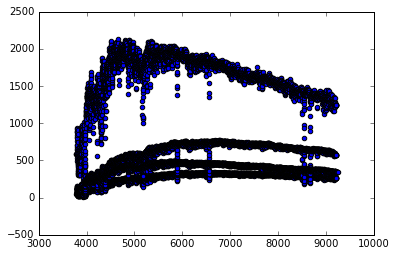

In [115]:
 for index, row in het_sub.iterrows():
        print (row[0].split('-')[0])
        plate=row[0].split('-')[0]
        mjd=row[0].split('-')[1]
        fiber=row[0].split('-')[2]
        spec = fetch_sdss_spectrum(float(plate),float(mjd),float(fiber))
        plt.scatter(spec.wavelength(),spec.spectrum)
        spec=pd.DataFrame([spec.wavelength(),spec.spectrum]).T
        spec.to_csv(plate+'-'+mjd+'-'+fiber+'.dat',index=False,header=False)

In [106]:
from matplotlib import pyplot as plt 

In [107]:
%matplotlib inline

In [109]:
 for index, row in het_sub.iterrows():
        print (index)

5
9
10
87


In [116]:
pwd

'/Users/gemunu/Research/canis/canis'

In [120]:
inds=pd.read_csv('indous_published.dat',header=None,sep='\t')

In [236]:
inds[15][109]

'G 250-22 HD 48948 BD+60 1003 SAO 13971 HIP 32769'

In [135]:
simco=pd.read_csv('simbadcool.dat',header=None,sep='\t')

In [355]:
inds

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,G 4-44,02:51:58.36,+11:22:11.9,8.92,8.38,G5,G5V,6.2,5750,-0.69,4.11,2000A&A...353..722N (Nissen),3465.0-7265.8,,3,G 4-44 HD 17820 BD+10 380 G 76-35 SAO 93151 HI...
1,G 5-40,03:27:39.70,+21:02:30.0,11.36,10.79,G0,G0V,-117.8,5863,-0.83,4.24,1997A&A...326..751N (Nissen),3465.0-7269.4,,3,G 5-40 BD+20 571 G 6-11
2,G 7-6,03:50:22.97,+17:28:34.9,8.18,7.52,G0,G0V,-9.3,5594,0.07,4.50,2001A&A...369.1048P (Prugniel),3465.0-8126.2,,4,G 7-6 HD 24040 BD+17 638 SAO 93630 HIP 17960
3,G 11-45,12:12:28.84,-03:05:04.1,8.15,7.50,G4V,G5V,14.1,5725,0.15,,1997A&A...323..809F (Favata),3465.0-8127.4,,4,G 11-45 HD 106116 BD-02 3481 G 13-19 SAO 13864...
4,G 12-21,12:12:01.37,+13:15:40.6,10.65,10.18,F2,F2V,95.0,5939,-1.33,4.23,2000A&A...353..722N (Nissen),3465.0-8104.2,5413.0-5465.4,4,G 12-21 HD 106038 BD+14 2481 G 57-39 SAO 99984...
5,G 12-22,12:12:57.53,+10:02:15.8,8.71,7.92,G8V,G8V,-8.8,5437,0.13,4.77,1998A&AS..129..237F (Feltzing),3465.0-8106.2,4763.8-5467.4,3,G 12-22 HD 106156 BD+10 2391 G 57-40 SAO 99991...
6,G 12-24,12:13:13.12,+10:49:18.0,8.24,7.56,G3V,G2V,-29.5,5337,-0.54,4.00,1994AJ....107.2240C (Carney),3465.0-9451.8,,6,G 12-24 HD 106210 BD+11 2439 G 57-41 SAO 99995...
7,G 15-20,15:22:42.55,+01:25:07.1,9.30,8.30,K3V,K3V,-30.4,4765,0.19,4.47,1998A&AS..129..237F (Feltzing),3465.0-8121.0,,4,G 15-20 HD 136834 BD+01 3071 SAO 120966 HIP 75266
8,G 16-13,15:50:58.93,+08:25:23.8,10.60,10.01,G0,G0V,-51.5,5593,-1.15,4.00,1994AJ....107.2240C (Carney),3465.0-9452.6,5415.8-5462.2,6,G 16-13 BD+08 3095 HIP 77637
9,G 16-32,16:09:11.21,+06:22:43.3,6.97,5.94,K1.5IV,K1IV,-4.0,4768,-0.07,3.40,1999A&A...348..487R (Randich),3465.0-9469.0,5415.0-5461.8,6,G 16-32 HD 145148 BD+06 3169 SAO 121392 HR 601...


In [239]:
simco.head()

,0,1,2
0,1,HIP 80,HD 224817
1,2,HIP 305,HD 225155
2,3,HIP 407,HD 225299
3,4,HIP 768,HD 489
4,5,HIP 1128,HD 967


In [257]:
data=[]
for index, row in simco.iterrows():
    #print (row[2])
    try:
        str1='HD '+str([int(s) for s in row[2].split() if s.isdigit() ][0])
        str3='HIP '+str([int(s) for s in row[1].split() if s.isdigit() ][0])
        ind=index
        #print (str1)
        #str1=str((filter(row[2].isdigit,str1)))
        for index, row in inds.iterrows():
            str2=row[15]
            if str2.find(str1) != -1 and str2.find(str3) != -1:
                #print (str1,ind,str2)
                print (row[0],str3,str1)
                data.append((row[0],str3,str1))
    except IndexError:
        pass
np.savetxt('./indous_matched_alpha.dat',data,fmt='%s',delimiter='/t')

G 4-44 HIP 13366 HD 17820
G 75-62 HIP 14241 HD 19034
G 80-15 HIP 17147 HD 22879
G 160-27 HIP 17987 HD 24156
G 82-12 HIP 20242 HD 27485
30562 HIP 22336 HD 30562
G 108-43 HIP 33582 HD 51754
52711 HIP 34017 HD 52711
62301 HIP 37789 HD 62301
G 90-25 HIP 38541 HD 64090
G 112-54 HIP 38625 HD 64606
76932 HIP 44075 HD 76932
78558 HIP 44860 HD 78558
91204 HIP 51579 HD 91204
104304 HIP 58576 HD 104304
G 11-45 HIP 59532 HD 106116
G 63-9 HIP 64426 HD 114762
126681 HIP 70681 HD 126681
134169 HIP 74079 HD 134169
140283 HIP 76976 HD 140283
144585 HIP 78955 HD 144585
G 16-32 HIP 79137 HD 145148
G 17-21 HIP 80837 HD 148816
G 17-30 HIP 81461 HD 149996
157089 HIP 84905 HD 157089
G 139-48 HIP 86013 HD 159482
165401 HIP 88622 HD 165401
G 143-17 HIP 98020 HD 188510
189558 HIP 98532 HD 189558
201099 HIP 104294 HD 201099
201891 HIP 104659 HD 201891
221830 HIP 116421 HD 221830


In [259]:
pd.read_csv('indous_matched_alpha.dat',header=None,sep='/t')

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


,0,1,2
0,G 4-44,HIP 13366,HD 17820
1,G 75-62,HIP 14241,HD 19034
2,G 80-15,HIP 17147,HD 22879
3,G 160-27,HIP 17987,HD 24156
4,G 82-12,HIP 20242,HD 27485
5,30562,HIP 22336,HD 30562
6,G 108-43,HIP 33582,HD 51754
7,52711,HIP 34017,HD 52711
8,62301,HIP 37789,HD 62301
9,G 90-25,HIP 38541,HD 64090


In [325]:
brensby=pd.read_csv('brensby_alpha.dat',comment='#',sep='\t',)
brensby.drop(brensby.index[[0,1]],inplace=True,)

In [327]:
brensby.head()

,HIP,Teff,logg,xi,Fe1,Fe2,M,Age,Fe/H,O/Fe,...,Rmin,Rmax,zmax,e,Elsr,Fe1H,Fe2H,Simbad,_RA,_DE
2,80,5856,4.10,1.12,6.97,6.97,0.89,11.8,-0.59,0.42,...,3.65,10.04,0.25,0.4663,0.9443,6.96,6.96,Simbad,000.24283,-11.82374
3,305,5607,4.01,1.02,7.74,7.75,1.10,7.7,0.18,0.04,...,8.17,8.73,0.32,0.0331,0.9953,7.74,7.83,Simbad,000.97231,-28.39381
4,407,5655,4.37,0.95,7.71,7.71,0.98,6.4,0.12,-0.05,...,7.53,8.57,0.11,0.0648,0.9806,7.70,7.79,Simbad,001.24466,-70.21244
5,699,6203,4.07,1.32,7.34,7.34,1.16,4.6,-0.23,,...,7.64,9.87,0.01,0.1270,1.0114,7.35,7.36,Simbad,002.17058,+36.62712
6,768,5716,4.31,1.11,7.61,7.61,0.99,7.9,0.03,0.13,...,5.37,9.44,0.30,0.2747,0.9570,7.64,7.50,Simbad,002.36730,+19.11579


In [328]:
alphs=brensby.ix[:,9:21]

In [346]:
alphs.head()

,O/Fe,Na/Fe,Mg/Fe,Al/Fe,Si/Fe,Ca/Fe,Ti/Fe,Cr/Fe,Ni/Fe,Zn/Fe,Y/Fe,Ba/Fe
2,0.42,0.08,0.29,0.25,0.16,0.17,0.20,-0.04,-0.02,0.13,-0.13,-0.09
3,0.04,0.01,0.11,0.13,0.05,0.03,0.02,-0.02,0.01,0.20,-0.16,-0.02
4,-0.05,-0.01,-0.01,-0.04,0.02,0.01,-0.03,0.03,0.01,-0.02,0.00,0.01
5,,0.05,0.06,0.02,0.05,0.08,0.01,-0.04,-0.03,-0.06,-0.09,0.17
6,0.13,0.08,0.08,0.04,0.05,0.04,0.03,0.02,-0.01,-0.08,-0.06,-0.05


In [341]:
dam=alphs.convert_objects(convert_numeric=True,)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [347]:
brensby['a/fe']=dam['Mg/Fe']+dam['Ti/Fe']+ dam['Ca/Fe']

In [354]:
brensby.loc[brensby.HIP.str.contains('13366',)]

,HIP,Teff,logg,xi,Fe1,Fe2,M,Age,Fe/H,O/Fe,...,Rmax,zmax,e,Elsr,Fe1H,Fe2H,Simbad,_RA,_DE,a/fe
99,13366,5856,4.26,1.04,6.88,6.88,0.83,12.5,-0.69,0.54,...,8.87,1.46,0.3912,0.9137,6.86,6.87,Simbad,042.99315,+11.36998,0.89


In [312]:
bm=pd.read_csv('besan_model1.csv')

In [313]:
bm.head()

,Dist,Mv,CL,Typ,LTef,logg,Age,Mass,B-V,U-B,V-I,V-K,V,[Fe/H],l,b,Av,Mbol
0,0.27,2.9,3,5.6,3.69,3.47,5,1.43,1.045,0.782,0.995,2.379,10.290,-0.02,240.00002,-9,0.178,1.982
1,0.43,1.8,3,4.4,3.82,3.73,3,1.78,0.510,0.090,0.583,1.219,10.286,-0.04,240.00002,-9,0.278,1.387
2,0.55,1.9,3,4.5,3.80,3.67,3,1.78,0.582,0.087,0.685,1.492,11.040,-0.19,240.00002,-9,0.342,1.439
3,0.69,0.9,3,6.0,3.66,2.57,4,1.61,1.312,1.189,1.248,2.934,10.426,-0.05,240.00002,-9,0.403,-0.158
4,0.71,2.9,3,5.6,3.69,3.43,5,1.31,1.072,0.678,1.083,2.578,12.503,-0.43,240.00002,-9,0.410,1.982


In [315]:
import seaborn as sns

In [316]:
from  matplotlib  import pyplot as plt

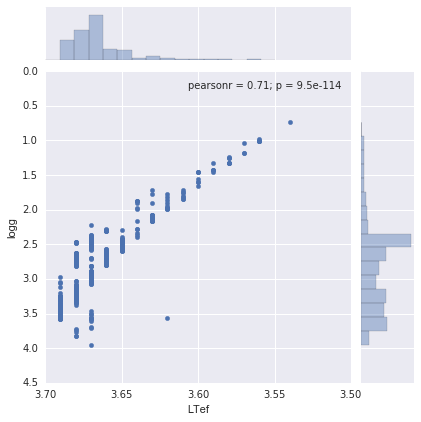

In [322]:
sns.jointplot(bm['LTef'],bm['logg'],ylim=(4.5,0),xlim=(3.7,3.5))

In [357]:
pd.read_csv('indous_matched_alpha.dat',header=None,sep='/t')

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


,0,1,2
0,G 4-44,HIP 13366,HD 17820
1,G 75-62,HIP 14241,HD 19034
2,G 80-15,HIP 17147,HD 22879
3,G 160-27,HIP 17987,HD 24156
4,G 82-12,HIP 20242,HD 27485
5,30562,HIP 22336,HD 30562
6,G 108-43,HIP 33582,HD 51754
7,52711,HIP 34017,HD 52711
8,62301,HIP 37789,HD 62301
9,G 90-25,HIP 38541,HD 64090


In [356]:
alph_ind=pd.read_csv('alpha_indous_werr.dat',header=None,sep=' ')

In [359]:
alph_ind.head(1)

,0,1,2,3,4,5,6
0,100006.s.dat,-0.12,-0.13,-0.12,-0.14,-0.16,-0.12


In [385]:
alph_ind.loc[alph_ind[0].str.contains('19034',)]

,0,1,2,3,4,5,6
